

---

<h1 style="text-align:center; color:#FFFF00;">
Project Name : (M&C 24JE)-Performance Analyzer
</h1>

---

### Built by :
- *Aman Soni (24JE0885)*


## Importing Necessary Modules
---

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import random

## Loading Dataset
---

In [24]:
try:
    df = pd.read_csv("/kaggle/input/marks-dataset/MC_Batch_Performance.csv")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    exit()

## Cleaning Dataset
---

In [25]:
def clean_data(df):
    try:
        # Step 1: Fill missing names with 'Unknown'
        df['Name'] = df['Name'].fillna('Unknown')

        # Step 2: Identify columns related to quizzes and mid-sem exams
        quiz_cols = []
        mid_cols = []
        for col in df.columns:
            if '_Quiz' in col:
                quiz_cols.append(col)
            elif '_Mid Sem' in col:
                mid_cols.append(col)

        # Step 3: Replace missing values in quiz and mid-sem columns with 0
        df[quiz_cols + mid_cols] = df[quiz_cols + mid_cols].fillna(0)

        # Step 4: Remove rows with invalid marks (Quiz > 10 or Mid Sem > 30)
        valid_quiz = (df[quiz_cols] <= 10).all(axis=1)
        valid_mid = (df[mid_cols] <= 30).all(axis=1)
        df = df[valid_quiz & valid_mid]

        # If no data left, return empty dataframe
        if df.empty:
            return df

        # Step 5: Keep only rows where 'Admission No.' starts with "24JE"
        df = df[df['Admission No.'].astype(str).str.startswith('24JE')]
        if df.empty:
            return df

        # Step 6: Extract numeric part of 'Admission No.' and filter range (879–933)
        df['Adm_Num'] =(
            df['Admission No.'].str.extract(r'^24JE(\d+)$')[0].astype(int)
        )
        df = df[(df['Adm_Num'] >= 879) & (df['Adm_Num'] <= 933)]

        df = df.drop(columns=['Adm_Num'])

        if df.empty:
            return df

        df['Name'] = df['Name'].str.title()

        df = df.fillna(0)

        return df

    except Exception as e:
        print("Error during cleaning:", e)
        return df


df = clean_data(df)


## **Analysis Function**
---

In [26]:
def analyze_subject(df, subject_full, friendly_name=None):
    # Friendly name for display
    if not friendly_name:
        friendly_name = subject_full.split('(')[0].strip()
    
    quiz_col = f"{subject_full}_Quiz"
    mid_col = f"{subject_full}_Mid Sem"
    total_col = f"{friendly_name}_Total"
    
    # Calculate total marks
    df[total_col] = df[quiz_col] + df[mid_col]
    
    print(f"===== {friendly_name} =====\n")
    
    # Find max marks
    max_quiz = df[quiz_col].max()
    max_mid = df[mid_col].max()
    max_total = df[total_col].max()
    
    # Print toppers
    print("Topper(s) in Quiz1:")
    for name in df[df[quiz_col] == max_quiz]['Name']:
        print(f"* {name} - {max_quiz}/10")
    
    print("\nTopper(s) in Mid Sem:")
    for name in df[df[mid_col] == max_mid]['Name']:
        print(f"* {name} - {max_mid}/30")
    
    print("\nTopper(s) Overall:")
    top_total = df[df[total_col] == max_total]['Name']
    for name in top_total:
        print(f"* {name} - {max_total}/40")
    
    avg_total = df[total_col].mean()
    median_total = df[total_col].median()
    min_total = df[total_col].min()
    std_total = df[total_col].std()
    
    print(f"\nAverage Total: {avg_total:.2f}/40")
    print(f"Median Total: {median_total:.2f}/40")
    print(f"Minimum Total: {min_total:.2f}/40")
    print(f"Standard Deviation: {std_total:.2f}\n")
    
    # Plot total marks
    plt.figure(figsize=(12,3))
    plt.scatter(df['Name'], df[total_col], color='red', s=40)
    plt.scatter(top_total, [max_total]*len(top_total), color='blue', s=150, marker='*')
    plt.axhline(avg_total, color='green', linestyle='-', label='Average')
    plt.xticks(rotation=90)
    plt.ylabel("Total Marks (/40)")
    plt.title(f"{friendly_name} - Marks Visualization")
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.show()


## Analysis For : Basics on Probability and Statistics (NMCE201)
---

===== Probability =====

Topper(s) in Quiz1:
* Kiran Pal - 9.0/10

Topper(s) in Mid Sem:
* Yash Jha - 23.5/30

Topper(s) Overall:
* Kiran Pal - 28.5/40
* Sanket Kumar Agarwal - 28.5/40

Average Total: 15.18/40
Median Total: 17.25/40
Minimum Total: 0.50/40
Standard Deviation: 8.08



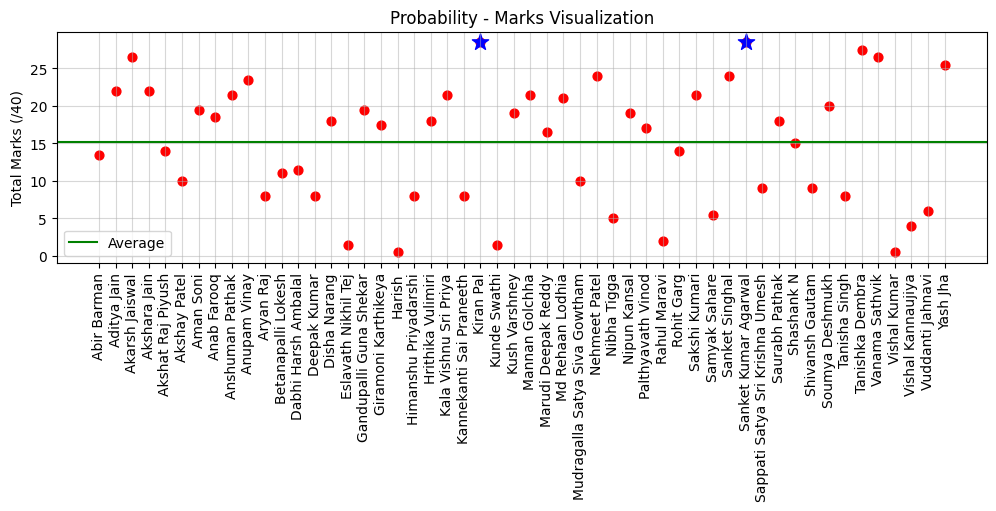

In [27]:
analyze_subject(df, "Basics on Probability and Statistics (NMCE201)", "Probability")


## Analysis For : Design and Analysis of Algorithms (NMCC202)
---


===== Algorithms =====

Topper(s) in Quiz1:
* Akarsh Jaiswal - 9.0/10

Topper(s) in Mid Sem:
* Kannekanti Sai Praneeth - 26.0/30
* Kiran Pal - 26.0/30
* Md Rehaan Lodhia - 26.0/30

Topper(s) Overall:
* Kannekanti Sai Praneeth - 34.0/40

Average Total: 22.35/40
Median Total: 23.00/40
Minimum Total: 10.00/40
Standard Deviation: 5.96



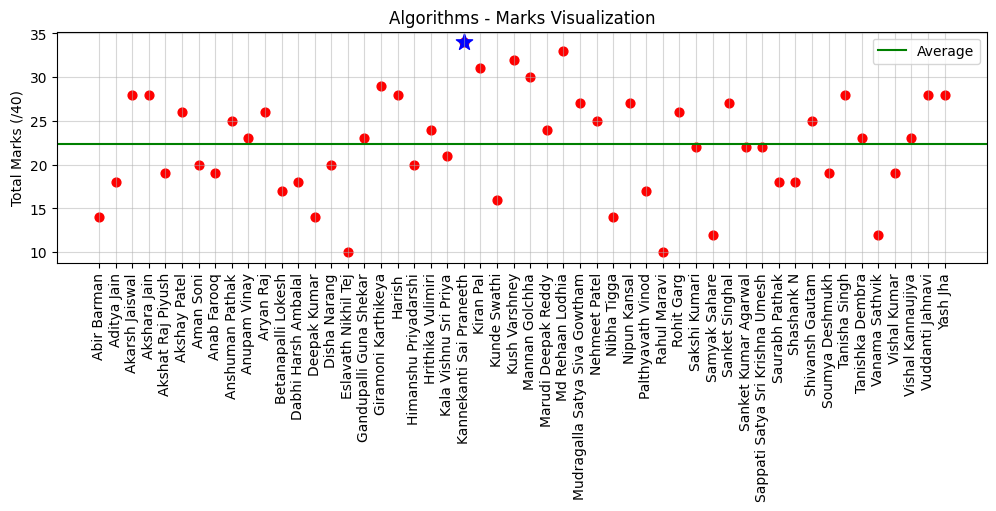

In [28]:
analyze_subject(df, "Design and Analysis of Algorithms (NMCC202)", "Algorithms")

## Analysis For : Differential Equations (NMCC203)
---

===== Diff_Equations =====

Topper(s) in Quiz1:
* Disha Narang - 10.0/10

Topper(s) in Mid Sem:
* Md Rehaan Lodhia - 30.0/30

Topper(s) Overall:
* Md Rehaan Lodhia - 38.0/40

Average Total: 24.73/40
Median Total: 25.00/40
Minimum Total: 9.00/40
Standard Deviation: 7.24



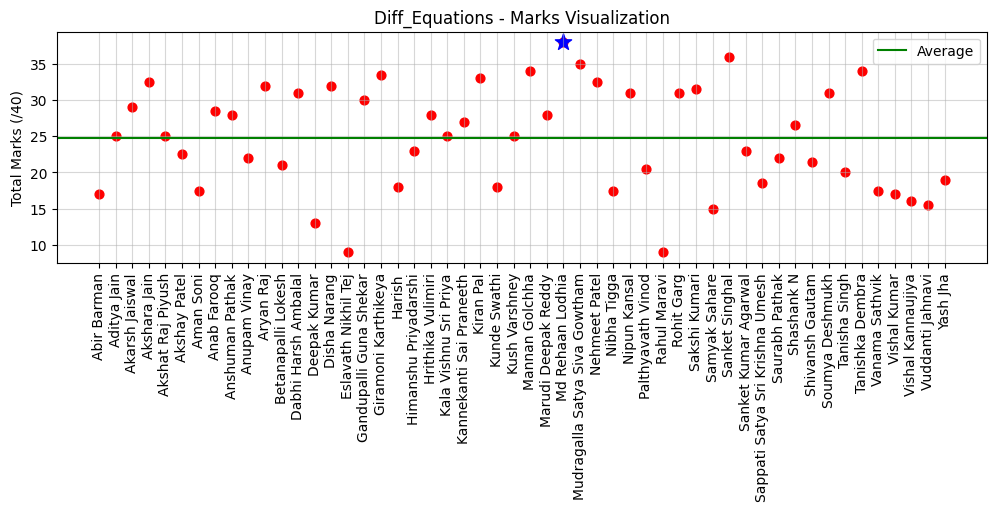

In [29]:
analyze_subject(df, "Differential Equations (NMCC203)", "Diff_Equations")

## Analysis For : Discrete Mathematics (NMCA201)
---

===== Discrete_Math =====

Topper(s) in Quiz1:
* Aditya Jain - 10.0/10
* Akarsh Jaiswal - 10.0/10
* Anshuman Pathak - 10.0/10
* Giramoni Karthikeya - 10.0/10
* Kiran Pal - 10.0/10
* Kush Varshney - 10.0/10
* Saurabh Pathak - 10.0/10
* Vishal Kannaujiya - 10.0/10

Topper(s) in Mid Sem:
* Akshara Jain - 30.0/30
* Aman Soni - 30.0/30
* Anshuman Pathak - 30.0/30
* Disha Narang - 30.0/30
* Giramoni Karthikeya - 30.0/30
* Harish - 30.0/30
* Md Rehaan Lodhia - 30.0/30
* Mudragalla Satya Siva Gowtham - 30.0/30
* Sakshi Kumari - 30.0/30
* Sanket Singhal - 30.0/30
* Soumya Deshmukh - 30.0/30
* Tanishka Dembra - 30.0/30

Topper(s) Overall:
* Anshuman Pathak - 40.0/40
* Giramoni Karthikeya - 40.0/40

Average Total: 35.19/40
Median Total: 36.00/40
Minimum Total: 26.50/40
Standard Deviation: 3.41



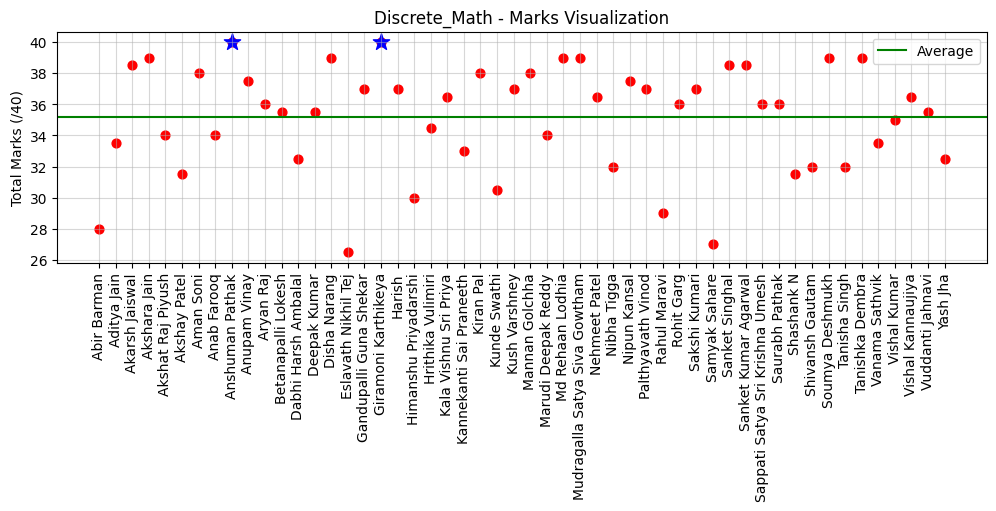

In [30]:
analyze_subject(df, "Discrete Mathematics (NMCA201)", "Discrete_Math")

## Analysis For : Algebra (NMCC201)
---

===== Algebra =====

Topper(s) in Quiz1:
* Akarsh Jaiswal - 10.0/10
* Md Rehaan Lodhia - 10.0/10
* Nehmeet Patel - 10.0/10
* Tanishka Dembra - 10.0/10

Topper(s) in Mid Sem:
* Disha Narang - 25.5/30

Topper(s) Overall:
* Disha Narang - 33.5/40
* Nehmeet Patel - 33.5/40

Average Total: 22.69/40
Median Total: 23.00/40
Minimum Total: 10.50/40
Standard Deviation: 5.58



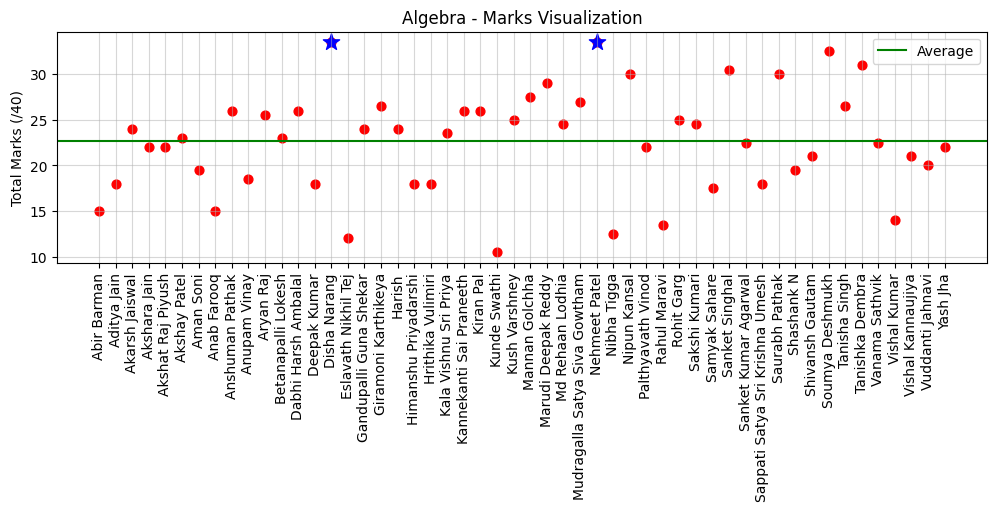

In [31]:
analyze_subject(df, "Algebra (NMCC201)", "Algebra")

## Student Comparision Function
---

In [32]:
def get_total(df, subject):
    """Calculate total marks for a subject if not already done."""
    total_col = subject + "_Total"
    if total_col not in df.columns:
        df[total_col] = df[subject + "_Quiz"] + df[subject + "_Mid Sem"]
    return total_col

def compare_students(df, st1, st2):
    # Standardize student names
    st1 = st1.title()
    st2 = st2.title()
    
    # Find all subjects from quiz columns
    subjects = [col.replace('_Quiz','') for col in df.columns if col.endswith('_Quiz')]
    
    data = []
    
    for sub in subjects:
        total_col = get_total(df, sub)
        rank_col = sub + "_Rank"
        # Calculate rank (1 = highest)
        df[rank_col] = df[total_col].rank(ascending=False, method='min')
        
        s1_total = df.loc[df['Name'] == st1, total_col].values[0]
        s2_total = df.loc[df['Name'] == st2, total_col].values[0]
        s1_rank = f"{int(df.loc[df['Name'] == st1, rank_col].values[0])}/{len(df)}"
        s2_rank = f"{int(df.loc[df['Name'] == st2, rank_col].values[0])}/{len(df)}"
        
        data.append([sub, s1_total, s1_rank, s2_total, s2_rank])
    
    compare_df = pd.DataFrame(data, columns=[
        'Subject', f'{st1} Total', f'{st1} Rank', f'{st2} Total', f'{st2} Rank'
    ])
    
    display(compare_df)
    
    compare_df[[f'{st1} Total', f'{st2} Total']].plot(kind='bar', figsize=(8,3))
    plt.ylabel("Total Marks")
    plt.title(f"{st1} vs {st2}")
    plt.grid(True, linestyle='-', alpha=0.5)
    plt.show()


## Student Comparision Terminal
---

In [34]:
student1 = input("Student1 Name: ").strip().lower()
student2 = input("Student2 Name: ").strip().lower()

name_mapping = {
    name.lower(): name for name in df['Name']
}
m_q = [
    "'Don’t waste energy trying to be like someone else. Focus on your own improvement.' — Lewis Carroll",
    "'Be proud of how far you’ve come and have faith in how far you can go.' — Wayne Dyer",
    "'Comparison steals your joy and your peace. Celebrate your uniqueness.' — Mark Batterson",
    "'Strive not to be better than others, but to be better than your former self.' — Dalai Lama",
    "'Don’t let the success of others discourage you. Let it inspire you.' — John Wooden"
]
if student1 in name_mapping and student2 in name_mapping:
    s1, s2 = name_mapping[student1], name_mapping[student2]
    compare_students(df, s1, s2)
    print(random.choice(m_q))
else:
    print("One or both student names not found.")

Student1 Name:  aman soni
Student2 Name:  anshuman


One or both student names not found.


---
<h1 style="text-align:center; color:#FF0000; font-weight:bold;">
(: THANK YOU :)
</h1>

---